<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Stanslus_Analysis_of_K_means_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
#Import dataset
customer = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/cust_seg.csv')
customer.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
#Get only required variables in the df
df = customer[['Age','Edu','Years Employed','Income', 'Card Debt','Defaulted','DebtIncomeRatio']]

In [5]:
df.head()
#Explore datasett

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


In [6]:
#Check any missing variables 
df.isna().sum()


Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
#Drop rows with missing variables 
df.dropna(subset=['Defaulted'], inplace=True)


<ipython-input-7-a1025fa4975b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Defaulted'], inplace=True)


In [8]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [16]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

EXPLANATORY ANALYSIS OF K MEANS DATA

In [17]:
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.594950,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,-0.594950,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,1.680814,1.559495
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.594950,-0.580528
4,1.519090,-0.779325,3.398538,5.637681,3.665215,-0.594950,-0.448609


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

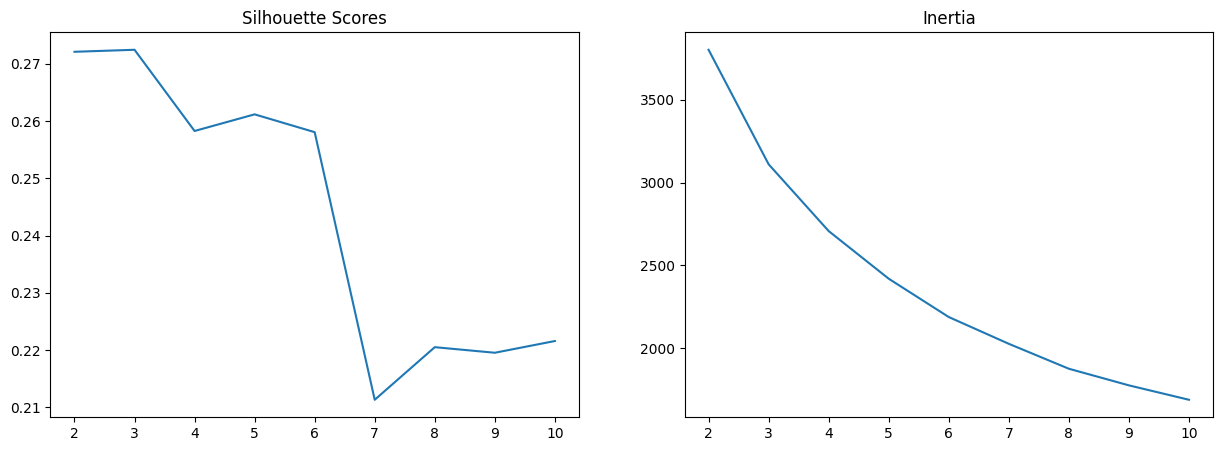

In [19]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);



In [27]:
#The best clusters are got at 3 clusters as shown by the highest silhouette scores and the inflexion of the elbow method 

In [21]:
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-0106dfc63bb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,0.0,6.3,0
1,47,1,26,100,4.582,0.0,12.8,2
2,33,2,10,57,6.111,1.0,20.9,1
3,29,2,4,19,0.681,0.0,6.3,0
4,47,1,31,253,9.308,0.0,7.2,2


In [22]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,0,33.028133,1.618926,6.918159,33.488491,0.780504,0.000000,8.164450
1,1,31.750000,1.898810,4.083333,32.761905,1.695071,0.988095,14.412500
2,2,43.645390,1.801418,17.595745,94.489362,3.528702,0.120567,11.126241


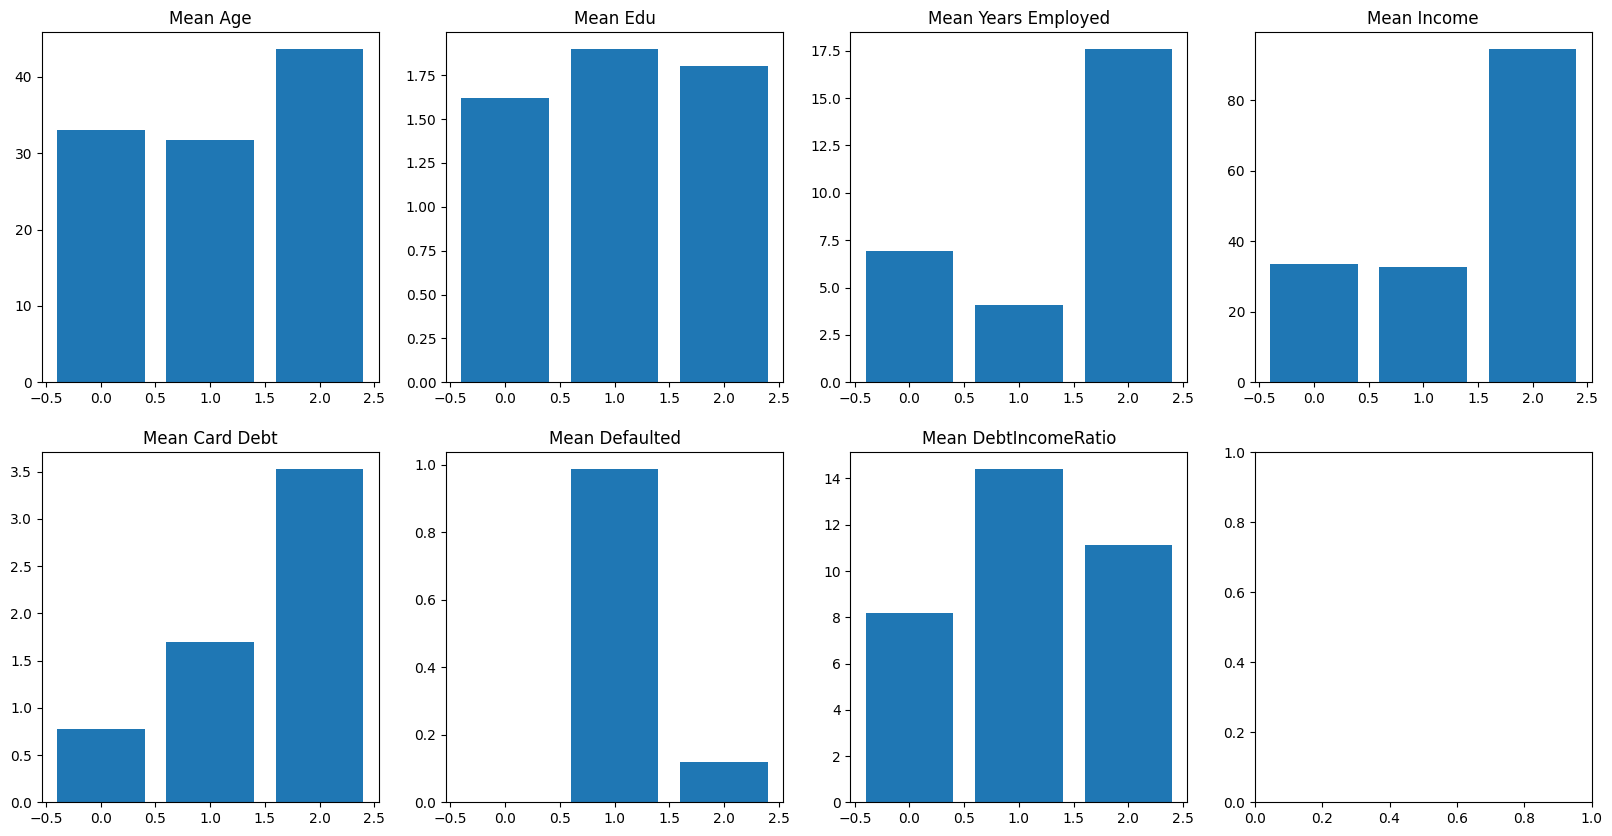

In [29]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 2,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')



**Group 0**
Are of medium age, lowest education, medium years of employment, low mean income, lowest mean car debt, no default and lowest mean to debt income ratio

**Group 1**
Are of a younger age, highest education, few years of employment, low income, medium card debt, highest propensity to default and highest mean to debt ration 

**Group 2**
Oldest in the group, medium levels of education, have the highest years of education and the highest mean income, highest debt, very low levels of default and medium debt to income ration
